### General intro Python, Google Colab, Keras z Tensorflow

!pip install <package-name>

In [ ]:
import tensorflow as tf

Poniższa komórka definiure dwa tensory. Dodaj kod, który wywołuje poniższe operacje na tych tensorach:
- kwadrat
- pierwiastek
- suma wszystkich możliwych i poprawnych par
- różnica wszystkich możliwych i poprawnych par
- iloczyn wszystkich możliwych i poprawnych par
- transpozycja tensora

In [ ]:
a = tf.ones((2, 2))
b = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.float32)
c = tf.constant([[1, 2], [2, 1]], dtype=tf.float32)

In [ ]:
# Tutaj miejsce na twój kod

### `tf.GradientTape` w TensorFlow

`tf.GradientTape` to interfejs do automatycznego różniczkowania w TensorFlow. Pozwala na śledzenie operacji matematycznych i obliczanie gradientów, co jest głównym zadaniem obliczeniowym podczas uczenia głebokich sieci neuronowych.
Zalety:

- Automatyczne obliczanie pochodnych
- Działa jako menedżer kontekstu
- Obsługa wyższych rzędów pochodnych (z pomocą trwałego gradientu, parametr `persistent`)

Przykład dla obliczenia prostej pochodnej funkcji nieliniowej

# Definicja zmiennej
x = tf.Variable(2.0)

# Użycie GradientTape do nagrywania operacji
with tf.GradientTape() as tape:
    y = x**2 + 2*x + 3  # Funkcja y = x^2 + 2x + 3

# Obliczanie pochodnej dy/dx
dy_dx = tape.gradient(y, x)

print("Gradient funkcji y względem x:", dy_dx.numpy())  # Oczekiwany wynik:

Przykład liczenia gradientu w 'Sieci Neuronowej' z użyciem numpy i błędem średniokwadratowym jako funkcją straty

In [ ]:
import numpy as np

# Inicjalizacja wag i biasu 'sieci'
w = 3.0
b = 1.0

# Dane treningowe
x_train = np.array([1.0, 2.0, 3.0])
y_train = np.array([3.0, 5.0, 7.0])  # Docelowe wartości

# Obliczanie przewidywań 'sieci'
y_pred = w * x_train + b

# Obliczanie błędu (straty)
loss = np.mean((y_pred - y_train) ** 2)

# Ręczne obliczanie gradientów - wartości pochodnej (złożonej) funkcji straty po w/b w punkcie x_train
dL_dw = np.mean(2 * (y_pred - y_train) * x_train)
dL_db = np.mean(2 * (y_pred - y_train))

print("Gradient względem w:", dL_dw)
print("Gradient względem b:", dL_db)

Gradient względem w: 9.333333333333334
Gradient względem b: 4.0


To samo z użyciem Tensorflow

In [ ]:
# Definicja zmiennych
w = tf.Variable(3.0)
b = tf.Variable(1.0)

# Funkcja straty (MSE)
def loss_fn(x, y_true):
    y_pred = w * x + b
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Dane treningowe
x_train = tf.constant([1.0, 2.0, 3.0])
y_train = tf.constant([3.0, 5.0, 7.0])

# Obliczanie gradientów
with tf.GradientTape() as tape:
    loss = loss_fn(x_train, y_train)

grads = tape.gradient(loss, [w, b])
print("Gradienty względem w:", grads[0].numpy())
print("Gradienty względem b:", grads[1].numpy())


Gradienty względem w: 9.333334
Gradienty względem b: 4.0


**TASK** Obliczyć gradient dla funkcji:
- y = x^2 + 16x + 4566769
- (\$) y = x^3 + x^2 + x

Przewidywanie autentyczności banknotów z uzyciem Sieci Neuronowych i Keras - klasyfikacja. (https://archive.ics.uci.edu/dataset/267/banknote+authentication)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

Wczytaj zbiór danych

In [ ]:
df = pd.read_csv('banknote.csv') # tutaj moze bedziecie musieli zmienic sciezke do pliku zalezy gdzie go zapiszeciemy

Inwestygacja zbioru danych

In [ ]:
df.head()


,0,1,2,3,target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.dtypes


,0
0,float64
1,float64
2,float64
3,float64
target,int64


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

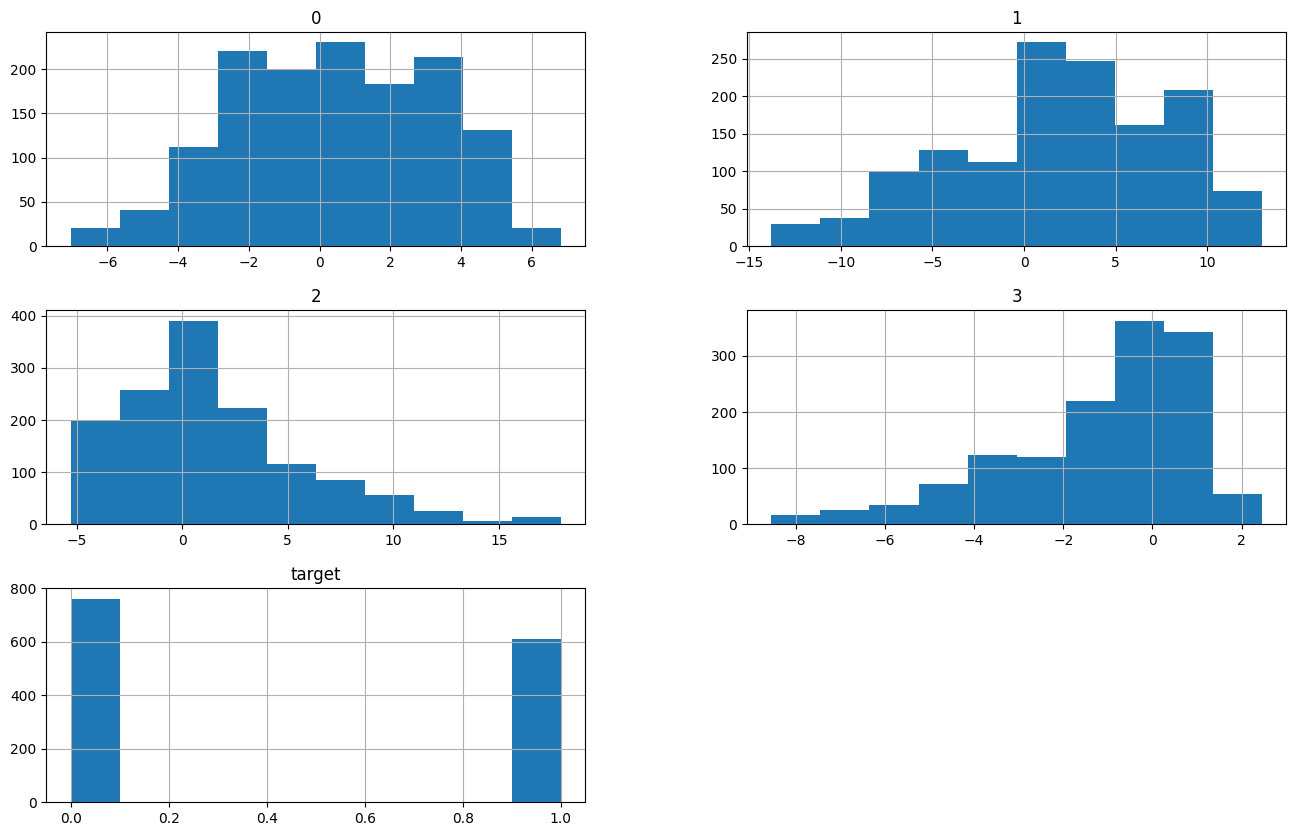

In [ ]:
df.hist(bins=10, figsize=(16,10))

Wyznaczenie kolumny do nauki sieci - target

In [ ]:
target_col = 'target'
target = df[target_col]


Wyznaczenie kolumn do nauki sieci - cechy

In [ ]:
numeric_features = df.drop(target_col, axis=1)
num_features = numeric_features.shape[1]
numeric_features.head()


,0,1,2,3
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


### Budowa sieci

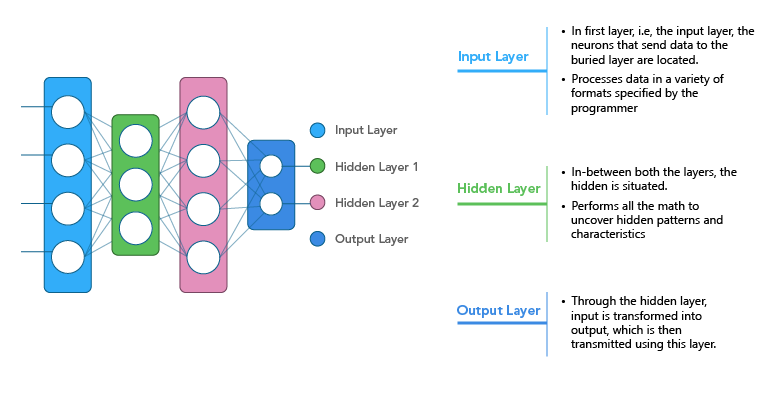

(źródło: https://www.softwebsolutions.com/resources/difference-between-cnn-rnn-ann.html)

Podstawowy model sztucznej sieci neuronowej w Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential([
  Dense(12, input_dim=num_features, kernel_initializer='uniform', activation='relu'),
  Dropout(0.2),
  Dense(6, kernel_initializer='uniform', activation='relu'),
  Dropout(0.1),
  Dense(1, kernel_initializer='uniform', activation='sigmoid')
]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer="Adamax", metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

Trening modelu

In [ ]:
model.fit(numeric_features, target, epochs=10, batch_size=16, validation_split=0.33)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8041 - loss: 0.6888 - val_accuracy: 0.0000e+00 - val_loss: 0.7190
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8274 - loss: 0.6656 - val_accuracy: 0.0000e+00 - val_loss: 0.7577
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8400 - loss: 0.6109 - val_accuracy: 0.0000e+00 - val_loss: 0.8191
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8389 - loss: 0.5153 - val_accuracy: 0.0000e+00 - val_loss: 0.9062
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8284 - loss: 0.4040 - val_accuracy: 0.0000e+00 - val_loss: 0.9841
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8481 - loss: 0.3102 - val_accuracy: 0.0000e+00 - val_loss: 1.0070
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8257 - loss: 0.2726 - val_accuracy: 0.0000e+00 - val_loss: 0.9816
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8291 - loss: 0.2418 - val_

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(numeric_features, target)
print(f'Test Accuracy: {accuracy:.2f}')


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8719 - loss: 0.1432 
Test Accuracy: 0.57


Predykcje

In [ ]:
model.predict(numeric_features.iloc[:3])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.00629817],
       [0.0033901 ],
       [0.0426935 ]], dtype=float32)

Analiza treningu

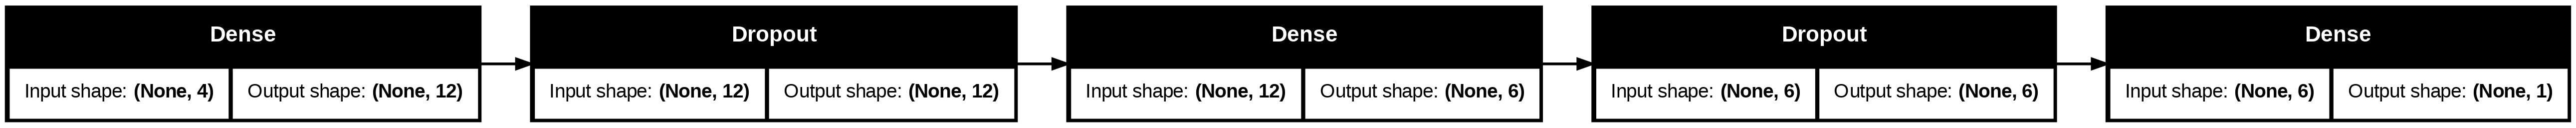

In [ ]:
tf.keras.utils.plot_model(model, rankdir="LR", show_shapes=True)


**TASK** Wykonać to samo tylko dla innego datasetu `BreastCancer`. Wymagania:
- Zastosować **podział na dane treningowe i testowe**
- Dodać metryki: **precision i recall** (lub inne odpowiednie dla danych multiclass)
- (\$) zamiast danych `BreastCancer` wybierz swoje dane do klasyfikacji z UCI ML, PMLB, Kaggle lub samemu wygenerować dane (\$\$)
- **TIP** Jeżeli dane mają więcej niż 2 klasy to należy wykonać enkodowanie targetu (etykiety) i odpowiednio zmienić warstwę wyjściową sieci
- (\$) Spróbować zmodyfikować  architekture sieci i proces uczenia żeby poprawić wstępne wyniki:
  - train test split
  - data augmentation
  - BatchNormalization Layer
  - Optimizer fine tuning
  - CNN architecture fine-tuning
  - Learning rate adaptation
  - Droput layers
  - Number of epochs
  - early stopping

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
x, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [ ]:
# miejsce na wasz kod